In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "diagrams"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [142]:
data = pd.concat(map(pd.read_csv, ['data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv', 
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_c6585a.csv',
                                 'data/realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv',
                                 'data/realAWSCloudwatch/rds_cpu_utilization_cc0c53.csv',
                                 'data/realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv'
                                ]))

# data = pd.concat(map(pd.read_csv, ['data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv',
#                                    'data/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv'
#                                 ]))

Alternative to above 
from os import listdir

filepaths = [f for f in listdir("./data/realAWSCloudwatch") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))

In [143]:
data.head()

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [144]:
data.shape

(40320, 2)

In [145]:
X = data.timestamp
y = data.value
data.value


0       51.8460
1       44.5080
2       41.2440
3       48.5680
4       46.7140
         ...   
4027    17.0900
4028    17.0800
4029    17.0825
4030    16.2525
4031    18.0050
Name: value, Length: 40320, dtype: float64

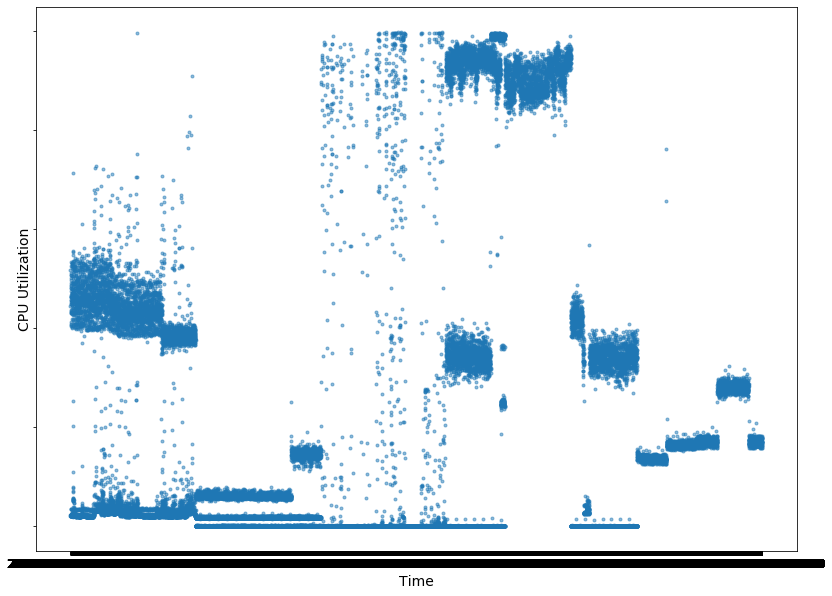

In [146]:
# plt.figure(figsize=(9, 3.5))
plt.figure(figsize=(30, 10))

plt.subplot(122)
# plt.scatter(X[:], y[:], c="k", marker=".")
plt.scatter(X[:], y[:], marker=".", alpha=0.5)
# np.linspace(0, 4032, 5)
plt.xlabel("Time", fontsize=14)
plt.ylabel("CPU Utilization", fontsize=14)
plt.tick_params(labelleft=False)

# save_fig("clustering_plot")
plt.show()

In [147]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
#     plt.scatter(X[:], X[:], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [148]:
#s_array = data[["timestamp","value"]].to_numpy()

s_array = data[["value","value"]].to_numpy()

#s_array = data[[tuple(range(1, data.value.size+1)),"value"]].to_numpy()

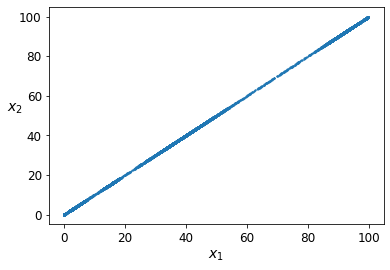

In [149]:

plot_clusters(s_array)
plt.show()

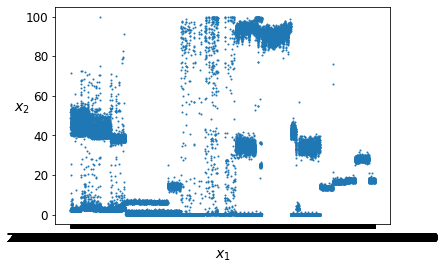

In [150]:
s_array = data[["timestamp","value"]].to_numpy()
plot_clusters(s_array)
plt.show()

In [190]:
from sklearn.cluster import KMeans

In [191]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data[["value","value"]].to_numpy())
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

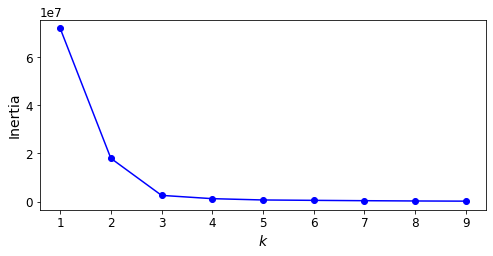

In [192]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([1, 8.5, 0, 1300])
#("inertia_vs_k_plot")
plt.show()

In [193]:


k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(data[["value","value"]].to_numpy())

In [194]:
y_pred

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [195]:
y_pred is kmeans.labels_

True

In [196]:
kmeans.cluster_centers_

array([[ 1.7423418 ,  1.7423418 ],
       [92.16714423, 92.16714423],
       [39.41238266, 39.41238266],
       [17.64925102, 17.64925102]])

In [197]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [203]:
X_new = np.array([[75, 75]])
new_pred = kmeans.predict(X_new)
new_pred[0]

1

In [204]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

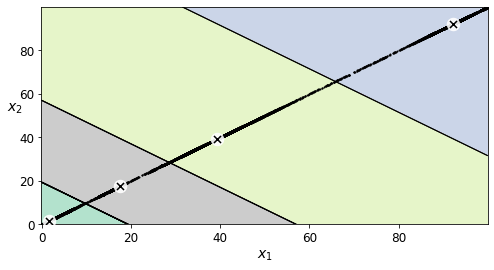

In [205]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, data[["value","value"]].to_numpy())
#save_fig("anomaly_plot")
plt.show()

Find optimal K value

In [206]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data[["value","value"]].to_numpy())
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

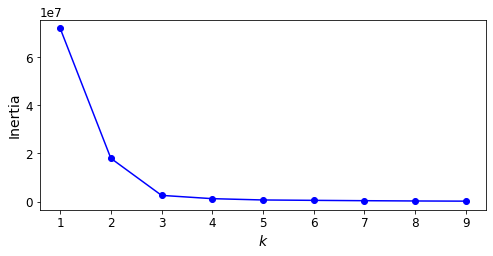

In [207]:

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([1, 8.5, 0, 1300])
#("inertia_vs_k_plot")
plt.show()